In [7]:
import pandas as pd

df_train = pd.read_csv('../data/Ask0729-fixed.txt', sep='\t', header=None, names=["label", "text"])
df_test = pd.read_csv('../data/testSet-qualifiedBatch-fixed.txt', sep='\t', header=None, names=["label", "text"])

df_test.head()

,label,text
0,No,I look forward to meeting you and learning abo...
1,No,We look forward to seeing you next week!
2,No,A quick question before our meeting.
3,No,After sunning and drinking all day we feasted ...
4,No,"Also Tuesday, Kyle and Eric 1/2 hour."


In [8]:
df_train['target'] = df_train.apply(lambda r: 1 if r['label']=='Yes' else 0, axis=1)
df_test['target'] = df_test.apply(lambda r: 1 if r['label']=='Yes' else 0, axis=1)

In [9]:
df_train.head()

,label,text,target
0,No,>>> [1]Contact Me Now to Make $100 Today!$LINK,0
1,No,Act now to keep your life on the go!,0
2,No,Choose between $500 and $10000 dollars with up...,0
3,No,Click above to earn today.,0
4,No,Click here to receive your first $10 today:,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3657 non-null   object
 1   text    3657 non-null   object
 2   target  3657 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 85.8+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   992 non-null    object
 1   text    992 non-null    object
 2   target  992 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.4+ KB


In [12]:
df_train.isna().sum()

label     0
text      0
target    0
dtype: int64

In [13]:
df_train.label.value_counts()

label
No     1938
Yes    1719
Name: count, dtype: int64

In [14]:
1719/3657

0.4700574241181296

In [15]:
df_test.label.value_counts()

label
No     683
Yes    309
Name: count, dtype: int64

In [16]:
309/992

0.31149193548387094

The train set exhibits somewhat minor imbalance (47% emails labeled 'yes'), but the test set is a lot more imbalanced (31% 'yes').

## Bigram analysis

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/fanch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fanch/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce
 
ps = PorterStemmer()
 
sentence = "Do Programmers program with programming languages?"
words = word_tokenize(sentence)
bigrams = [words[i] + ' ' + words[i+1] for i in range(len(words)-1)]
print(bigrams)
 
# using reduce to apply stemmer to each word and join them back into a string
stemmed_sentence = reduce(lambda x, y: x + " " + ps.stem(y), words, "")
 
print(stemmed_sentence)

['Do Programmers', 'Programmers program', 'program with', 'with programming', 'programming languages', 'languages ?']
 do programm program with program languag ?


In [145]:
from collections import defaultdict

positiveValues=defaultdict(int)
negativeValues=defaultdict(int)

In [146]:
for txt in df_train[df_train.label=="Yes"].text:
    words = word_tokenize(txt)
    bigrams = [words[i] + ' ' + words[i+1] for i in range(len(words)-1) if words[i] not in set(stopwords.words('english'))]
    for b in bigrams:
        positiveValues[b] += 1

for txt in df_test[df_test.label=="No"].text:
    words = word_tokenize(txt)
    bigrams = [words[i] + ' ' + words[i+1] for i in range(len(words)-1) if words[i] not in set(stopwords.words('english'))]
    for b in bigrams:
        negativeValues[b] += 1

In [147]:
positiveValues

defaultdict(int,
            {'-If you': 2,
             'want others': 1,
             'others to': 1,
             'help manage': 1,
             'manage your': 4,
             'channel ,': 1,
             ', you': 33,
             'add up': 1,
             '50 people': 1,
             'people without': 1,
             'without sharing': 1,
             'sharing your': 1,
             'password .': 3,
             '3 .': 4,
             '. Select': 1,
             'Select the': 2,
             'services that': 1,
             'want to': 90,
             'add .': 1,
             'Also want': 1,
             'talk about': 11,
             'voicemail last': 1,
             'last night': 3,
             'night --': 1,
             '-- i.e.': 1,
             'i.e. ,': 2,
             ', I': 73,
             'I may': 5,
             'may need': 4,
             'need to': 64,
             'travel with': 1,
             'KL ,': 1,
             ', which': 5,
             'fine by': 1,
       

In [148]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))

In [149]:
df_positive[:30]

,0,1
0,", please",158
1,If you,110
2,like to,106
3,want to,90
4,would like,75
5,", I",73
6,need to,64
7,I would,59
8,let me,51
9,$ LINK,50


In [150]:
df_negative[:30]

,0,1
0,", and",53
1,", I",45
2,I am,41
3,I will,37
4,I have,35
5,", but",33
6,week .,33
7,I 'm,32
8,next week,25
9,", so",25


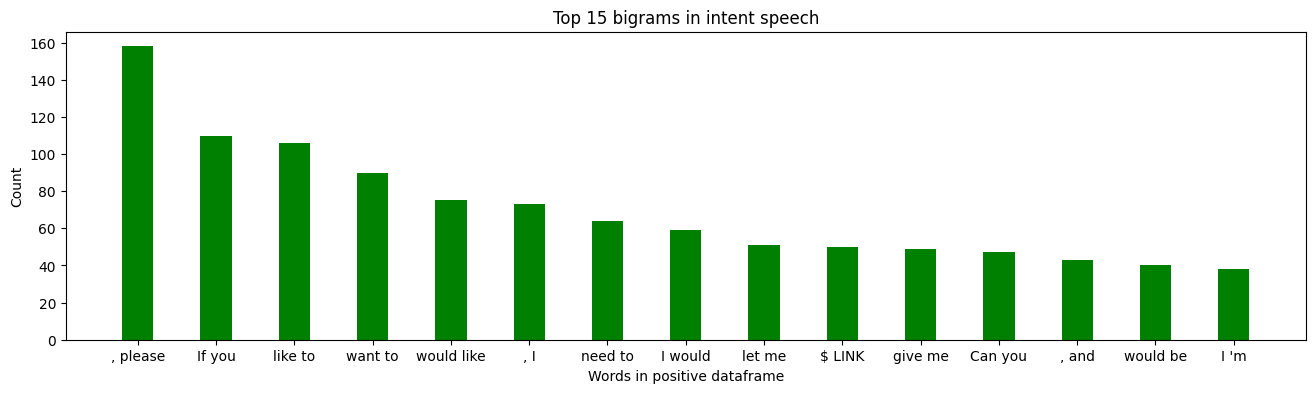

In [151]:
import matplotlib.pyplot as plt

yes_txt   = df_positive[0][:15]
yes_count = df_positive[1][:15]

plt.figure(1,figsize=(16,4))
plt.bar(yes_txt,yes_count, color ='green', width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 15 bigrams in intent speech")
plt.show()

In [152]:
import matplotlib.pyplot as plt

df_positive[-15:]

,0,1
10262,yet got,1
10263,review us,1
10264,"Appstore ,",1
10265,request you,1
10266,us spread,1
10267,spread awareness,1
10268,awareness among,1
10269,among more,1
10270,consumers and,1
10271,businesses like,1


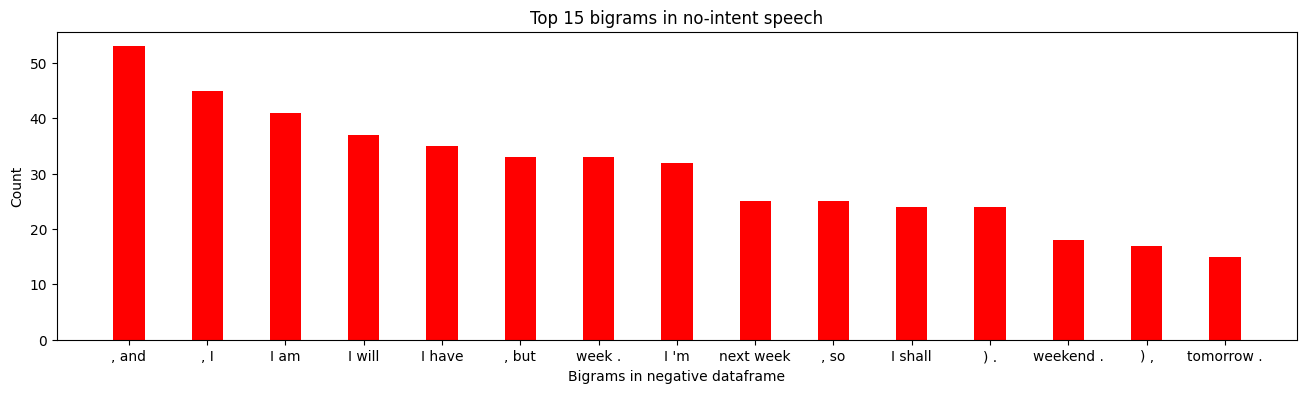

In [153]:
no_txt   = df_negative[0][:15]
no_count = df_negative[1][:15]

plt.figure(1,figsize=(16,4))
plt.bar(no_txt,no_count, color ='red', width = 0.4)
plt.xlabel("Bigrams in negative dataframe")
plt.ylabel("Count")
plt.title("Top 15 bigrams in no-intent speech")
plt.show()

In [154]:
df_negative[-15:]

,0,1
6038,things next,1
6039,Your December,1
6040,December 2001,1
6041,2001 issue,1
6042,issue of,1
6043,E-lert for,1
6044,personal development,1
6045,development in,1
6046,business is,1
6047,: //www.BusinessCafeOnline.com,1


## First model: Complement Naive Bayes on TF-IDF matrix

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("clf", ComplementNB()),
    ]
)
pipeline

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', ComplementNB())])

In [64]:
import numpy as np

parameter_grid = {
    "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
    "vect__min_df": (1, 3, 5, 10),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "vect__norm": ("l1", "l2"),
    "clf__alpha": np.logspace(-6, 6, 13),
}

In [19]:
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=40,
    random_state=0,
    n_jobs=2,
    verbose=1,
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'rbf_svm__C': [1, 10, 100, 1000],
 'rbf_svm__class_weight': ['balanced', None],
 'rbf_svm__gamma': [0.001, 0.0001, 'scale'],
 'rbf_svm__kernel': ['rbf', 'linear', 'poly'],
 'vect__max_df': (0.2, 0.4, 0.6, 0.8, 1.0),
 'vect__min_df': (1, 3, 5, 10),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__norm': ('l1', 'l2')}


In [71]:
from time import time

t0 = time()
random_search.fit(df_train.text, df_train.target)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Done in 10.371s


In [72]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
clf__alpha: 1.0
vect__max_df: 0.6
vect__min_df: 3
vect__ngram_range: (1, 2)
vect__norm: l1


In [77]:
test_accuracy = random_search.score(df_test.text, df_test.target)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.732
Accuracy on test set: 0.785


## Improved model: Support Vector Machine on TF-IDF matrix

In [20]:
from sklearn.svm import SVC

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("rbf_svm", SVC()),
    ]
)

#pipeline

parameter_grid = {
        "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
        "vect__min_df": (1, 3, 5, 10),
        "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
        "vect__norm": ("l1", "l2"),
        'rbf_svm__C': [1, 10, 100, 1000], 
        'rbf_svm__gamma': [0.001, 0.0001, 'scale'], 
        'rbf_svm__kernel': ['rbf', 'linear', 'poly'],
        'rbf_svm__class_weight': ['balanced', None]
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=100,
    random_state=0,
    n_jobs=2,
    verbose=1,
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'rbf_svm__C': [1, 10, 100, 1000],
 'rbf_svm__class_weight': ['balanced', None],
 'rbf_svm__gamma': [0.001, 0.0001, 'scale'],
 'rbf_svm__kernel': ['rbf', 'linear', 'poly'],
 'vect__max_df': (0.2, 0.4, 0.6, 0.8, 1.0),
 'vect__min_df': (1, 3, 5, 10),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__norm': ('l1', 'l2')}


In [ ]:
from time import time

t0 = time()
random_search.fit(df_train.text, df_train.target)
print(f"Done in {time() - t0:.3f}s")

In [ ]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
rbf_svm__C: 1
rbf_svm__class_weight: balanced
rbf_svm__gamma: scale
rbf_svm__kernel: rbf
vect__max_df: 0.4
vect__min_df: 1
vect__ngram_range: (1, 2)
vect__norm: l2


In [123]:
test_accuracy = random_search.score(df_test.text, df_test.target)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.756
Accuracy on test set: 0.826


              precision    recall  f1-score   support

           0       0.90      0.84      0.87       683
           1       0.69      0.79      0.74       309

    accuracy                           0.83       992
   macro avg       0.80      0.82      0.80       992
weighted avg       0.84      0.83      0.83       992



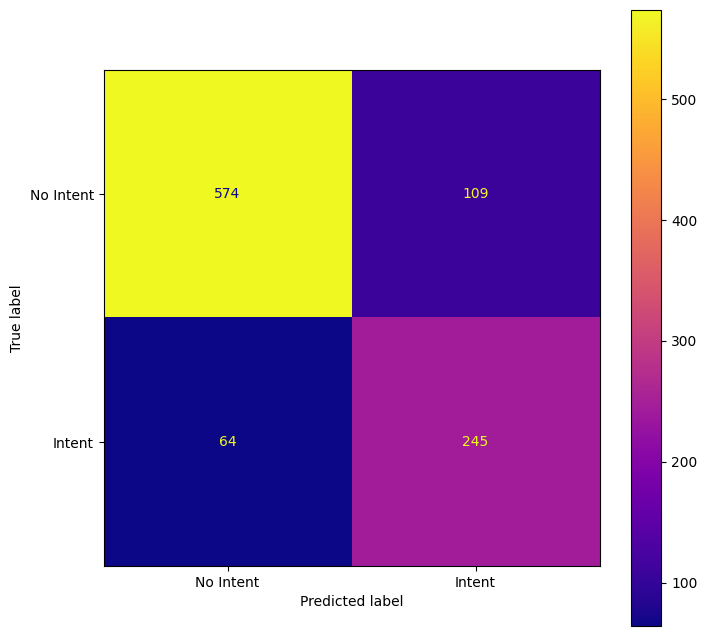

In [137]:
import joblib
from sklearn.metrics import make_scorer, classification_report, ConfusionMatrixDisplay, precision_recall_curve, f1_score

# Saving the best model
joblib.dump(random_search.best_estimator_, './best_model.pkl')
# Loading the best model
load_model = joblib.load('./best_model.pkl')
best_clf_pipe=load_model
# Predicting the class
y_pred=best_clf_pipe.predict(df_test.text)
# Classification Report
print(classification_report(df_test.target,y_pred))
# Confusion Matrix
fig, axs = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(best_clf_pipe, df_test.text, 
                                      df_test.target, values_format='d',
                                      display_labels=['No Intent','Intent'],
                                      cmap='plasma', ax=axs)

In [23]:
import joblib
load_model = joblib.load('./best_model.pkl')
best_clf_pipe=load_model
# Predicting the class
y_pred=best_clf_pipe.predict(df_test.text)


In [24]:
y_pred==df_test.target

0       True
1       True
2      False
3       True
4       True
       ...  
987     True
988     True
989     True
990     True
991     True
Name: target, Length: 992, dtype: bool

In [25]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [29]:
thisone = pd.DataFrame.from_dict([{"text": "Please review the below and lets discuss if this really works."}])
thisone

,text
0,Please review the below and lets discuss if th...


In [33]:
best_clf_pipe.predict(thisone.text)

array([1])

In [32]:
df_test.text.tail()

987    Could you call me on Monday with further infor...
988       Please call me at your convenience to discuss.
989    Please call the list around 200 to see if peop...
990    Please give us a call tomorrow to discuss brie...
991    Please review the below and lets discuss if th...
Name: text, dtype: object

In [155]:
(245+574)/992

0.8256048387096774

Quoting the Parakweet wiki page:

With LibSVM on the selected n-gram feature vectors we have provided:

- Precision: 71.9%
- Recall: 78.5%
- F1: 71.2%
- Accuracy: 79.0%

With LibSVM on feature vectors that combine n-grams and proprietary ActivityRelation signal (not in feature files provided):

- Precision: 77.3%
- Recall: 78.3%
- F1: 77.8%
- Accuracy: 86.0%

Our model achieves better precision, recall and F1 than their best model, while having a precision that sits 3 points below theirs. 
It would be good to have access to their perf metrics at the class level, because it's not obvious to me how their accuracy can be so high given their precision and recall.

## SGD Classifier

We do this to have access to reliable probabilities (SVC implem does not guarantee they are reliable), and visualize a ROC curve.


In [176]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer()),
        ("sgd", SGDClassifier()),
    ]
)

#pipeline

parameter_grid = {
        "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
        "vect__min_df": (1, 3, 5, 10),
        "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
        "vect__norm": ("l1", "l2"),
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
        'sgd__class_weight' : ['balanced', None],
        'sgd__penalty': ['l2', 'l1']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=100,
    random_state=0,
    n_jobs=2,
    verbose=1,
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'sgd__class_weight': ['balanced', None],
 'sgd__loss': ['hinge',
               'log_loss',
               'modified_huber',
               'squared_hinge',
               'perceptron'],
 'sgd__penalty': ['l2', 'l1'],
 'vect__max_df': (0.2, 0.4, 0.6, 0.8, 1.0),
 'vect__min_df': (1, 3, 5, 10),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__norm': ('l1', 'l2')}


In [177]:
from time import time

t0 = time()
random_search.fit(df_train.text, df_train.target)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/fanch/.pyenv/versions/3.10.12/envs/modal/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/fanch/.pyenv/versions/3.10.12/envs/modal/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/fanch/.pyenv/versions/3.10.12/envs/modal/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/fanch/.pyenv/versions/3.10.12/envs/modal/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before converg

Done in 26.565s


In [178]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
sgd__class_weight: balanced
sgd__loss: log_loss
sgd__penalty: l2
vect__max_df: 1.0
vect__min_df: 1
vect__ngram_range: (1, 2)
vect__norm: l2


In [179]:
test_accuracy = random_search.score(df_test.text, df_test.target)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.753
Accuracy on test set: 0.819


              precision    recall  f1-score   support

           0       0.92      0.81      0.86       683
           1       0.66      0.84      0.74       309

    accuracy                           0.82       992
   macro avg       0.79      0.82      0.80       992
weighted avg       0.84      0.82      0.82       992



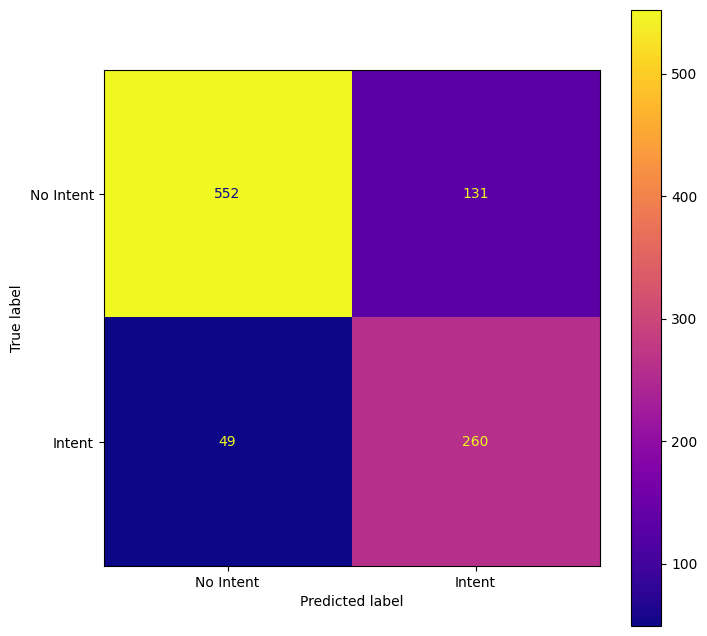

In [180]:
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, f1_score

# Saving the best model
joblib.dump(random_search.best_estimator_, './sgd_model.pkl')
# Loading the best model
load_model = joblib.load('./sgd_model.pkl')
best_clf_pipe=load_model
# Predicting the class
y_pred=best_clf_pipe.predict(df_test.text)
# Classification Report
print(classification_report(df_test.target,y_pred))
# Confusion Matrix
fig, axs = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(best_clf_pipe, df_test.text, 
                                      df_test.target, values_format='d',
                                      display_labels=['No Intent','Intent'],
                                      cmap='plasma', ax=axs)

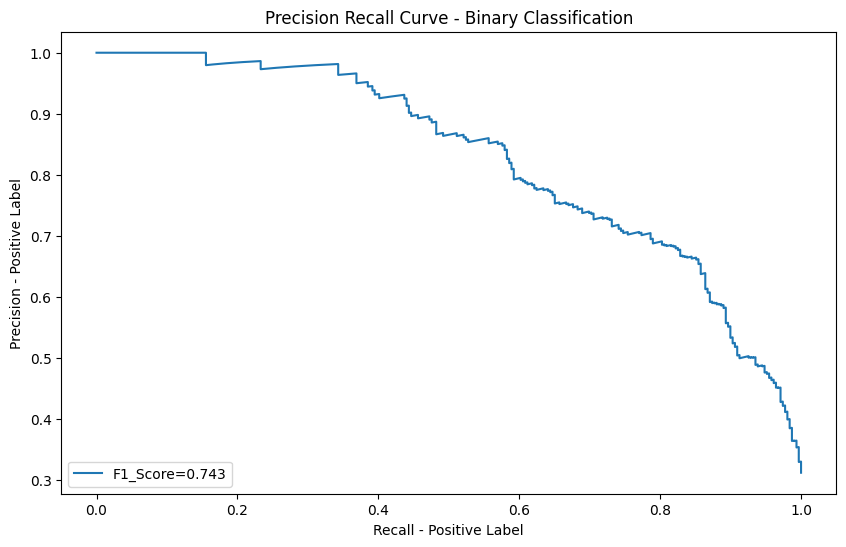

In [181]:
y_prob=best_clf_pipe.predict_proba(df_test.text)

precision,recall,thresholds = precision_recall_curve(df_test.target,y_prob[:,1])
plt.figure(figsize=(10,6))
plt.plot(recall,precision,label='F1_Score={0:0.3f}'.format(f1_score(df_test.target, y_pred,average='binary',pos_label=1)))
plt.xlabel('Recall - Positive Label')
plt.ylabel('Precision - Positive Label')
plt.title('Precision Recall Curve - Binary Classification')
plt.legend(loc='lower left')
plt.show()

## Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

estimators = []
estimators.append(('logistic', LogisticRegression()))
estimators.append(('cart', DecisionTreeClassifier()))
estimators.append(('svm', SVC()))

# Create the Ensemble Model
ensemble = VotingClassifier(estimators)

# Make preprocess Pipeline
pipe = Pipeline([
    ("vect", TfidfVectorizer()),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),  # Min Max Scaler
    ('model', ensemble)  # Ensemble Model
])

In [169]:
parameter_grid = {
        "vect__max_df": (0.2, 0.4, 0.6, 0.8, 1.0),
        "vect__min_df": (1, 3, 5, 10),
        "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
        "vect__norm": ("l1", "l2"),
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=100,
    random_state=0,
    n_jobs=2,
    verbose=1,
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'vect__max_df': (0.2, 0.4, 0.6, 0.8, 1.0),
 'vect__min_df': (1, 3, 5, 10),
 'vect__ngram_range': ((1, 1), (1, 2)),
 'vect__norm': ('l1', 'l2')}


In [170]:
from time import time

t0 = time()
random_search.fit(df_train.text, df_train.target)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/home/fanch/.pyenv/versions/3.10.12/envs/modal/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Done in 17.408s


In [171]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
vect__max_df: 1.0
vect__min_df: 1
vect__ngram_range: (1, 2)
vect__norm: l2


In [172]:
test_accuracy = random_search.score(df_test.text, df_test.target)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.748
Accuracy on test set: 0.765


              precision    recall  f1-score   support

           0       0.89      0.76      0.82       683
           1       0.59      0.79      0.68       309

    accuracy                           0.77       992
   macro avg       0.74      0.77      0.75       992
weighted avg       0.80      0.77      0.77       992



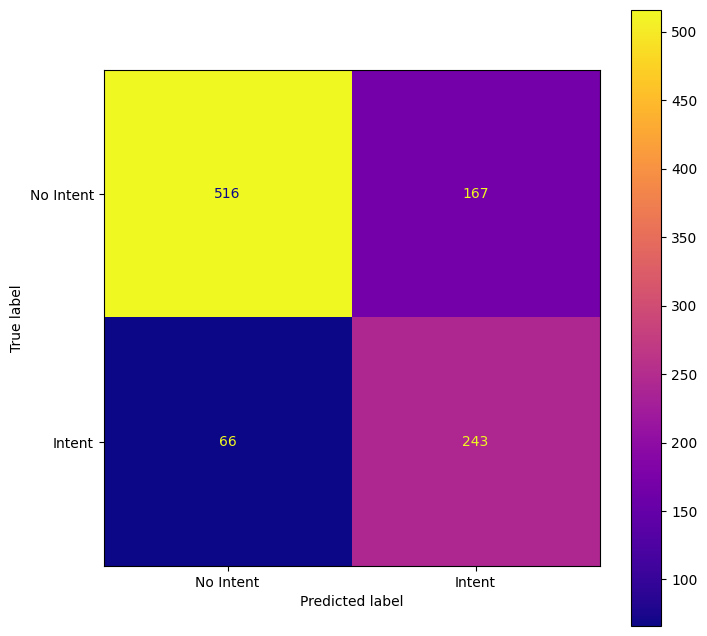

In [174]:
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, f1_score

# Saving the best model
joblib.dump(random_search.best_estimator_, './ensemble_model.pkl')
# Loading the best model
load_model = joblib.load('./ensemble_model.pkl')
best_clf_pipe=load_model
# Predicting the class
y_pred=best_clf_pipe.predict(df_test.text)
# Classification Report
print(classification_report(df_test.target,y_pred))
# Confusion Matrix
fig, axs = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(best_clf_pipe, df_test.text, 
                                      df_test.target, values_format='d',
                                      display_labels=['No Intent','Intent'],
                                      cmap='plasma', ax=axs)

## Feature Hashing

In [210]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import FeatureHasher

def tokenize(txt):
    words = word_tokenize(txt)
    return [words[i] + ' ' + words[i+1] for i in range(len(words)-1) if words[i] not in set(stopwords.words('english'))]

df_train['bigrams'] = df_train.apply(lambda r: tokenize(r['text']), axis=1)

h = FeatureHasher(n_features=2**18, input_type='string')
h_train = h.transform(df_train.bigrams)

pipeline = Pipeline(
    [
        ("sgd", SGDClassifier()),
    ]
)

parameter_grid = {
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
        'sgd__class_weight' : ['balanced'],
        'sgd__penalty': ['l2', 'l1']
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameter_grid,
    n_iter=100,
    random_state=0,
    n_jobs=2,
    verbose=1,
)

print("Performing grid search...")
print("Hyperparameters to be evaluated:")
pprint(parameter_grid)

Performing grid search...
Hyperparameters to be evaluated:
{'sgd__class_weight': ['balanced'],
 'sgd__loss': ['hinge',
               'log_loss',
               'modified_huber',
               'squared_hinge',
               'perceptron'],
 'sgd__penalty': ['l2', 'l1']}


In [211]:
from time import time

t0 = time()
random_search.fit(h_train, df_train.target)
print(f"Done in {time() - t0:.3f}s")

/home/fanch/.pyenv/versions/3.10.12/envs/modal/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Done in 0.578s


In [212]:
print("Best parameters combination found:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameter_grid.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameters combination found:
sgd__class_weight: balanced
sgd__loss: hinge
sgd__penalty: l2


In [213]:
df_test['bigrams'] = df_test.apply(lambda r: tokenize(r['text']), axis=1)

# h = FeatureHasher(n_features=2**18, input_type='string')
h_test = h.transform(df_test.bigrams)

In [214]:
test_accuracy = random_search.score(h_test, df_test.target)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.676
Accuracy on test set: 0.761


              precision    recall  f1-score   support

           0       0.84      0.80      0.82       683
           1       0.61      0.67      0.64       309

    accuracy                           0.76       992
   macro avg       0.72      0.74      0.73       992
weighted avg       0.77      0.76      0.76       992



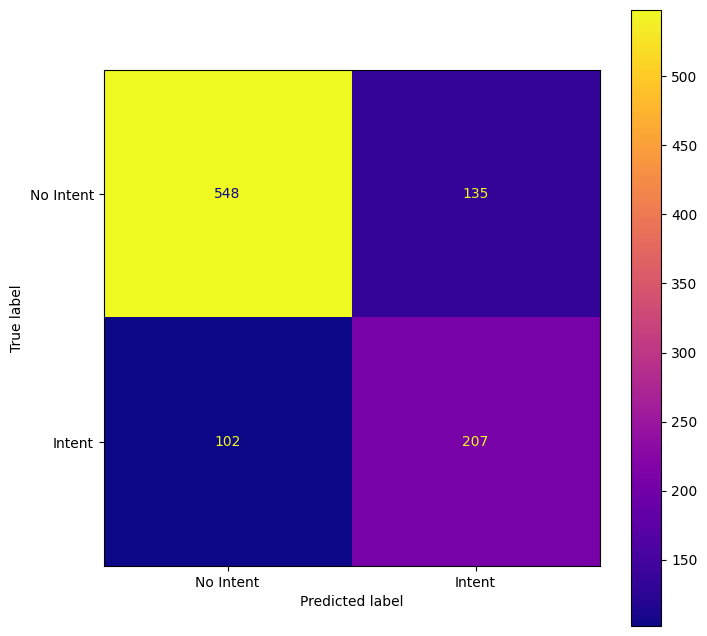

In [215]:
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, f1_score

# Saving the best model
joblib.dump(random_search.best_estimator_, './hash_model.pkl')
# Loading the best model
load_model = joblib.load('./hash_model.pkl')
best_clf_pipe=load_model
# Predicting the class
y_pred=best_clf_pipe.predict(h_test)
# Classification Report
print(classification_report(df_test.target,y_pred))
# Confusion Matrix
fig, axs = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(best_clf_pipe, h_test, 
                                      df_test.target, values_format='d',
                                      display_labels=['No Intent','Intent'],
                                      cmap='plasma', ax=axs)